In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
training_data = pd.read_csv('Training_Data.csv')

In [ ]:
flux_training_data = training_data.drop(columns = ['Classification'])
Galaxy_Classifications = training_data['Classification']

In [ ]:
def change_values(value):
    if (value == 'Star Forming'):
      return 0
    if (value == "LINER"):
      return 1
    if (value == "Composite"):
      return 2
    if (value == 'Seyfert'):
      return 3

In [ ]:
Galaxy_Classifications = Galaxy_Classifications.apply(change_values)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flux_training_data, Galaxy_Classifications, test_size=0.2, random_state=42)

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [ ]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
svm_classifier = SVC(kernel='rbf', C = 10, gamma = 1)

In [ ]:
svm_classifier.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [ ]:
y_pred = svm_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9416


In [ ]:

report = classification_report(y_test, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     12314
           1       0.94      0.91      0.92      1864
           2       0.91      0.76      0.83      3137
           3       0.99      0.84      0.91       742

    accuracy                           0.94     18057
   macro avg       0.95      0.88      0.91     18057
weighted avg       0.94      0.94      0.94     18057



In [ ]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[12296     1    16     1]
 [    1  1693   165     5]
 [  687    60  2389     1]
 [    7    44    67   624]]


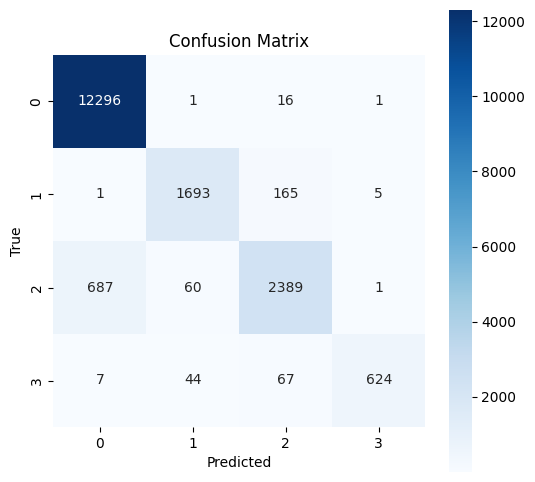

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
#plt.savefig('confusion_matrix.png', format='png')

<h1> Performance on Testing Set 1 <h1>

In [ ]:
data2 = pd.read_csv('Testing_.15.csv')

In [ ]:
Data = {
    'specObjID': data2['specObjID'],
    'ra': data2['ra'],
    'dec': data2['dec'],
    'redshift': data2['z'],
    'Flux_NII_6583/Flux_Ha_6562': data2['Flux_NII_6583']/data2['Flux_Ha_6562'],
    'Flux_OIII_5006/Flux_Hb_4861': data2['Flux_OIII_5006']/data2['Flux_Hb_4861'],
    'Flux_OII_3726/Flux_OIII_5006': data2['Flux_OII_3726']/data2['Flux_OIII_5006'],
    'Flux_OI_6300/Flux_Ha_6562': data2['Flux_OI_6300']/data2['Flux_Ha_6562'],
    'Flux_SII_6716/Flux_Ha_6562': data2['Flux_SII_6716']/data2['Flux_Ha_6562'],
    'Flux_OIII_5006/Flux_OIII_4363':data2['Flux_OIII_5006']/data2['Flux_OIII_4363'],
    'Flux_OII_3726/Flux_Hb_4861': data2['Flux_OII_3726']/data2['Flux_Hb_4861'],
    'Classification': data2['bpt']
}
data = pd.DataFrame(data = Data)

In [ ]:
threshold = 1000
Q1 = data['Flux_NII_6583/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_NII_6583/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_NII_6583/Flux_Ha_6562'] >= lower_bound) & (data['Flux_NII_6583/Flux_Ha_6562'] <= upper_bound)]


Q1 = data['Flux_OIII_5006/Flux_Hb_4861'].quantile(0.25)
Q3 = data['Flux_OIII_5006/Flux_Hb_4861'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OIII_5006/Flux_Hb_4861'] >= lower_bound) & (data['Flux_OIII_5006/Flux_Hb_4861'] <= upper_bound)]

Q1 = data['Flux_OII_3726/Flux_OIII_5006'].quantile(0.25)
Q3 = data['Flux_OII_3726/Flux_OIII_5006'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OII_3726/Flux_OIII_5006'] >= lower_bound) & (data['Flux_OII_3726/Flux_OIII_5006'] <= upper_bound)]

Q1 = data['Flux_OI_6300/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_OI_6300/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OI_6300/Flux_Ha_6562'] >= lower_bound) & (data['Flux_OI_6300/Flux_Ha_6562'] <= upper_bound)]

Q1 = data['Flux_SII_6716/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_SII_6716/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_SII_6716/Flux_Ha_6562'] >= lower_bound) & (data['Flux_SII_6716/Flux_Ha_6562'] <= upper_bound)]

Q1 = data['Flux_OIII_5006/Flux_OIII_4363'].quantile(0.25)
Q3 = data['Flux_OIII_5006/Flux_OIII_4363'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OIII_5006/Flux_OIII_4363'] >= lower_bound) & (data['Flux_OIII_5006/Flux_OIII_4363'] <= upper_bound)]

Q1 = data['Flux_OII_3726/Flux_Hb_4861'].quantile(0.25)
Q3 = data['Flux_OII_3726/Flux_Hb_4861'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
testing_data = data[(data['Flux_OII_3726/Flux_Hb_4861'] >= lower_bound) & (data['Flux_OII_3726/Flux_Hb_4861'] <= upper_bound)]

In [ ]:
flux_testing_data = testing_data.drop(columns = ['specObjID', 'ra', 'dec', 'redshift','Classification'])
Galaxy_Classifications_testing = testing_data['Classification']

In [ ]:
Galaxy_Classifications_testing = Galaxy_Classifications_testing.apply(change_values)

In [ ]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(flux_testing_data)
flux_testing_data = scaling.transform(flux_testing_data)

In [ ]:
svm_classifier = SVC(kernel='rbf', C = 10, gamma = 1)

In [ ]:
svm_classifier.fit(flux_testing_data, Galaxy_Classifications_testing)

SVC(C=10, gamma=1)

In [ ]:
y_pred = svm_classifier.predict(flux_testing_data)

In [ ]:
accuracy = accuracy_score(Galaxy_Classifications_testing, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9317


In [ ]:
report = classification_report(Galaxy_Classifications_testing, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     87210
           1       0.92      0.91      0.91     18104
           2       0.88      0.80      0.84     28222
           3       0.99      0.79      0.88      8186

    accuracy                           0.93    141722
   macro avg       0.93      0.87      0.90    141722
weighted avg       0.93      0.93      0.93    141722



<h1> Performance on Testing Set 2 <h1>

In [ ]:
data2 = pd.read_csv('Testing_.3.csv')

In [ ]:
Data = {
    'specObjID': data2['specObjID'],
    'ra': data2['ra'],
    'dec': data2['dec'],
    'redshift': data2['z'],
    'Flux_NII_6583/Flux_Ha_6562': data2['Flux_NII_6583']/data2['Flux_Ha_6562'],
    'Flux_OIII_5006/Flux_Hb_4861': data2['Flux_OIII_5006']/data2['Flux_Hb_4861'],
    'Flux_OII_3726/Flux_OIII_5006': data2['Flux_OII_3726']/data2['Flux_OIII_5006'],
    'Flux_OI_6300/Flux_Ha_6562': data2['Flux_OI_6300']/data2['Flux_Ha_6562'],
    'Flux_SII_6716/Flux_Ha_6562': data2['Flux_SII_6716']/data2['Flux_Ha_6562'],
    'Flux_OIII_5006/Flux_OIII_4363':data2['Flux_OIII_5006']/data2['Flux_OIII_4363'],
    'Flux_OII_3726/Flux_Hb_4861': data2['Flux_OII_3726']/data2['Flux_Hb_4861'],
    'Classification': data2['bpt']
}
data = pd.DataFrame(data = Data)

In [ ]:
threshold = 1000
Q1 = data['Flux_NII_6583/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_NII_6583/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_NII_6583/Flux_Ha_6562'] >= lower_bound) & (data['Flux_NII_6583/Flux_Ha_6562'] <= upper_bound)]


Q1 = data['Flux_OIII_5006/Flux_Hb_4861'].quantile(0.25)
Q3 = data['Flux_OIII_5006/Flux_Hb_4861'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OIII_5006/Flux_Hb_4861'] >= lower_bound) & (data['Flux_OIII_5006/Flux_Hb_4861'] <= upper_bound)]

Q1 = data['Flux_OII_3726/Flux_OIII_5006'].quantile(0.25)
Q3 = data['Flux_OII_3726/Flux_OIII_5006'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OII_3726/Flux_OIII_5006'] >= lower_bound) & (data['Flux_OII_3726/Flux_OIII_5006'] <= upper_bound)]

Q1 = data['Flux_OI_6300/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_OI_6300/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OI_6300/Flux_Ha_6562'] >= lower_bound) & (data['Flux_OI_6300/Flux_Ha_6562'] <= upper_bound)]

Q1 = data['Flux_SII_6716/Flux_Ha_6562'].quantile(0.25)
Q3 = data['Flux_SII_6716/Flux_Ha_6562'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_SII_6716/Flux_Ha_6562'] >= lower_bound) & (data['Flux_SII_6716/Flux_Ha_6562'] <= upper_bound)]

Q1 = data['Flux_OIII_5006/Flux_OIII_4363'].quantile(0.25)
Q3 = data['Flux_OIII_5006/Flux_OIII_4363'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
data = data[(data['Flux_OIII_5006/Flux_OIII_4363'] >= lower_bound) & (data['Flux_OIII_5006/Flux_OIII_4363'] <= upper_bound)]

Q1 = data['Flux_OII_3726/Flux_Hb_4861'].quantile(0.25)
Q3 = data['Flux_OII_3726/Flux_Hb_4861'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR
testing_data = data[(data['Flux_OII_3726/Flux_Hb_4861'] >= lower_bound) & (data['Flux_OII_3726/Flux_Hb_4861'] <= upper_bound)]

In [ ]:
flux_testing_data = testing_data.drop(columns = ['specObjID', 'ra', 'dec', 'redshift','Classification'])
Galaxy_Classifications_testing = testing_data['Classification']

In [ ]:
Galaxy_Classifications_testing = Galaxy_Classifications_testing.apply(change_values)

In [ ]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(flux_testing_data)
flux_testing_data = scaling.transform(flux_testing_data)

In [ ]:
svm_classifier = SVC(kernel='rbf', C = 10, gamma = 1)

In [ ]:
svm_classifier.fit(flux_testing_data, Galaxy_Classifications_testing)

SVC(C=10, gamma=1)

In [ ]:
y_pred = svm_classifier.predict(flux_testing_data)

In [ ]:
accuracy = accuracy_score(Galaxy_Classifications_testing, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9279


In [ ]:
report = classification_report(Galaxy_Classifications_testing, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     95452
           1       0.91      0.91      0.91     27941
           2       0.87      0.82      0.84     37185
           3       0.99      0.79      0.88     12640

    accuracy                           0.93    173218
   macro avg       0.93      0.88      0.90    173218
weighted avg       0.93      0.93      0.93    173218



<h1> Peformance on smaller subset <h1>

In [ ]:
flux_training_data_BPT = training_data.drop(columns = ['Classification'])

In [ ]:
flux_training_data_BPT = training_data.drop(columns = ['Classification', 'Flux_OII_3726/Flux_OIII_5006', 'Flux_OI_6300/Flux_Ha_6562', 'Flux_SII_6716/Flux_Ha_6562', 'Flux_OIII_5006/Flux_OIII_4363', 'Flux_OII_3726/Flux_Hb_4861' ])

In [ ]:
Galaxy_Classifications = training_data['Classification']
def change_values(value):
    if (value == 'Star Forming'):
      return 0
    if (value == "LINER"):
      return 1
    if (value == "Composite"):
      return 2
    if (value == 'Seyfert'):
      return 3
Galaxy_Classifications = Galaxy_Classifications.apply(change_values)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(flux_training_data_BPT, Galaxy_Classifications, test_size=0.2, random_state=42)

In [ ]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [ ]:
svm_classifier = SVC(kernel='rbf', C = 10, gamma = 1)

In [ ]:
svm_classifier.fit(X_train, y_train)

SVC(C=10, gamma=1)

In [ ]:
y_pred = svm_classifier.predict(X_test)

In [ ]:
report = classification_report(y_test, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     12314
           1       0.94      0.90      0.92      1864
           2       0.90      0.75      0.82      3137
           3       1.00      0.84      0.91       742

    accuracy                           0.94     18057
   macro avg       0.94      0.87      0.90     18057
weighted avg       0.94      0.94      0.94     18057



<h1> Regularization Parameter <h1>

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
svm_classifier = SVC(kernel='rbf')

In [ ]:
grid_search = GridSearchCV(svm_classifier, param_grid)

In [ ]:
grid_search.fit(X_train, y_train)  # X_train and y_train are your training data and labels.

GridSearchCV(estimator=SVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
results = grid_search.cv_results_

In [ ]:
print(results)

{'mean_fit_time': array([ 95.0252686 ,  96.96311679, 103.2047523 , 113.30828166,
       108.5924624 ,  88.80663714]), 'std_fit_time': array([0.51373563, 1.91321622, 1.42040207, 2.78154974, 1.41949986,
       0.89491712]), 'mean_score_time': array([28.07617154, 28.30738583, 28.06151495, 28.15020933, 28.18137617,
       24.84517155]), 'std_score_time': array([0.9201784 , 0.8784202 , 0.40833229, 0.13242479, 0.78748585,
       0.08301175]), 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}], 'split0_test_score': array([0.68736587, 0.68736587, 0.6874351 , 0.68909657, 0.70764971,
       0.82312219]), 'split1_test_score': array([0.6874351 , 0.6874351 , 0.6874351 , 0.68819661, 0.70231914,
       0.80546902]), 'split2_test_score': array([0.68736587, 0.68736587, 0.68750433, 0.68861198, 0.705365

In [ ]:
best_C = grid_search.best_params_['C']
print(best_C)

100


In [ ]:
mean_test_scores = grid_search.cv_results_['mean_test_score']
params = grid_search.cv_results_['params']

In [ ]:
for mean_score, param in zip(mean_test_scores, params):
    print(f"Parameters: {param}, Mean Test Score: {mean_score}")

Parameters: {'C': 0.001}, Mean Test Score: 0.6873892338312063
Parameters: {'C': 0.01}, Mean Test Score: 0.6873892338312063
Parameters: {'C': 0.1}, Mean Test Score: 0.6874446163164953
Parameters: {'C': 1}, Mean Test Score: 0.6887599743064226
Parameters: {'C': 10}, Mean Test Score: 0.7056518403298103
Parameters: {'C': 100}, Mean Test Score: 0.8158367786825742


<h1> Gamma <h1>

In [ ]:
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
svm_classifier = SVC(kernel='rbf')

In [ ]:
grid_search = GridSearchCV(svm_classifier, param_grid)

In [ ]:
grid_search.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
results = grid_search.cv_results_

AttributeError: ignored